# Neural Networks Implementation

### PreProcess Data

In [49]:
import PreProcessData as pre
import imp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

imp.reload(pre)
X_train, X_valid, y_train, y_valid = pre.PreProcessData()
y_valid = [0 if int(y) == 2 or int(y) == 3 else y for y in y_valid]
y_valid = np.array(y_valid)
y_valid = y_valid.reshape(-1,1)
# print(X_train.head())

### Class Construction

In [71]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.01):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.learning_rate = learning_rate

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.biases_input_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.biases_hidden_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def relu(self, x):
        return np.maximum(0, x)

    def relu_derivative(self, x):
        return np.where(x >= 0, 1, 0)

    def feedforward(self, X):
        # Input to hidden layer
        self.hidden_sum = np.dot(X, self.weights_input_hidden) + self.biases_input_hidden
        # self.hidden_activation = self.relu(self.hidden_sum)
        self.hidden_activation = self.sigmoid(self.hidden_sum)

        # Hidden to output layer
        self.output_sum = np.dot(self.hidden_activation, self.weights_hidden_output) + self.biases_hidden_output
        self.output_activation = self.sigmoid(self.output_sum)

        return self.output_activation

    def backward(self, X, y, output):
        # Output layer
        error_output = y - output
        delta_output = error_output * self.sigmoid_derivative(output)

        # Hidden layer
        error_hidden = error_output.dot(self.weights_hidden_output.T)
        # delta_hidden = error_hidden * self.relu_derivative(output)
        delta_hidden = error_hidden * self.sigmoid_derivative(self.hidden_activation)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_activation.T.dot(delta_output) * self.learning_rate
        self.biases_hidden_output += np.sum(delta_output, axis=0, keepdims=True) * self.learning_rate
        self.weights_input_hidden += X.T.dot(delta_hidden) * self.learning_rate
        self.biases_input_hidden += np.sum(delta_hidden, axis=0, keepdims=True) * self.learning_rate

    def train(self, X, y, epochs):
        y = y.reshape(-1,1)
        for epoch in range(epochs):
            # Forward pass
            output = self.feedforward(X)

            # Backpropagation
            self.backward(X, y, output)

            # Print loss every 100 epochs
            if (epoch + 1) % 100 == 0:
                loss = -(y * np.log(output) + (1 - y) * np.log(1 - output))
                loss = np.mean(loss)
                # loss = np.mean((output - y) ** 2)
                print(f'Epoch {epoch + 1}, Loss: {loss:.4f}')
                # print(f'Epoch {epoch + 1}, Loss: {loss}')

    def predict(self, X):
        return self.feedforward(X)

    def validate(self, y_pred, y_valid):
        num_of_correct_predictions = np.sum((y_pred >= 0.5) == y_valid)
        accuracy = num_of_correct_predictions / len(y_valid)
        return accuracy

    def plot(self, y_pred, y_valid):
        y_pred = [0 if y < 0.5 else 1 for y in y_pred]
        # Calculate confusion matrix
        cm = confusion_matrix(y_valid, y_pred)

        # Define labels for the confusion matrix
        labels = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

        # Annotate cells with labels
        for i in range(2):
            for j in range(2):
                plt.text(j + 0.5, i + 0.3, labels[i][j], ha='center', va='center', color='red')

        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix with Labels')
        plt.show()

### 1 Neuron Model Construction

In [72]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 1 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model1 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model1.train(np.array(X_train), np.array(y_train), epochs)
predictions1 = np.array(model1.predict(X_valid))
print("Model Accuracy", model1.validate(predictions1, y_valid))

Epoch 100, Loss: 0.5211
Epoch 200, Loss: 0.5186


/tmp/ipykernel_1061083/3663800361.py:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


Epoch 300, Loss: 0.5192
Epoch 400, Loss: 0.5191
Epoch 500, Loss: 0.5187
Epoch 600, Loss: 0.5185
Epoch 700, Loss: 0.5185
Epoch 800, Loss: 0.5186
Epoch 900, Loss: 0.5187
Epoch 1000, Loss: 0.5188
Model Accuracy 0.6272666218938885


We can see that nothing was learned here because the loss function value didn't change by much.

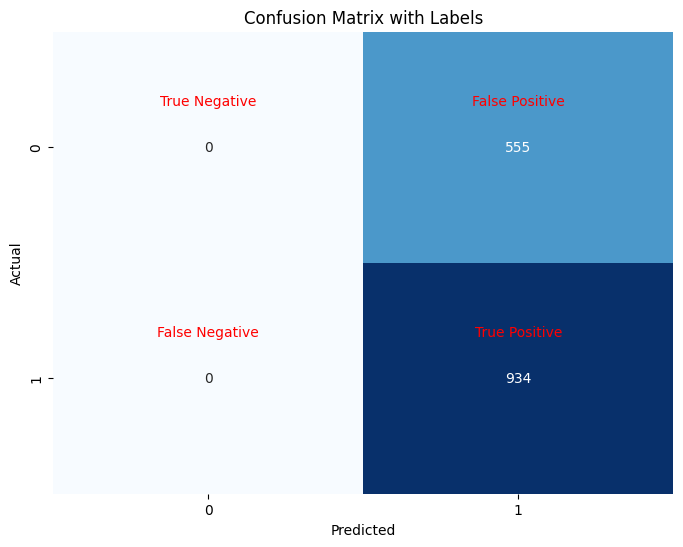

In [73]:
model1.plot(predictions1, y_valid)

### 4 Neuron Model Construction

In [74]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 4 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model4 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model4.train(np.array(X_train), np.array(y_train), epochs)
predictions4 = np.array(model4.predict(X_valid))
print("Model Accuracy", model4.validate(predictions4, y_valid))

Epoch 100, Loss: 0.4860
Epoch 200, Loss: 0.4896
Epoch 300, Loss: 0.4910
Epoch 400, Loss: 0.4941
Epoch 500, Loss: 0.4977
Epoch 600, Loss: 0.5005
Epoch 700, Loss: 0.5024
Epoch 800, Loss: 0.5035
Epoch 900, Loss: 0.5043
Epoch 1000, Loss: 0.5051
Model Accuracy 0.6803223640026864


However when we add more neurons we can see that the Loss goes down and the model accuracy goes up (down in comparision to the previous model). It also seems like the overflow error requires more iterations to reach the more neurons you add.

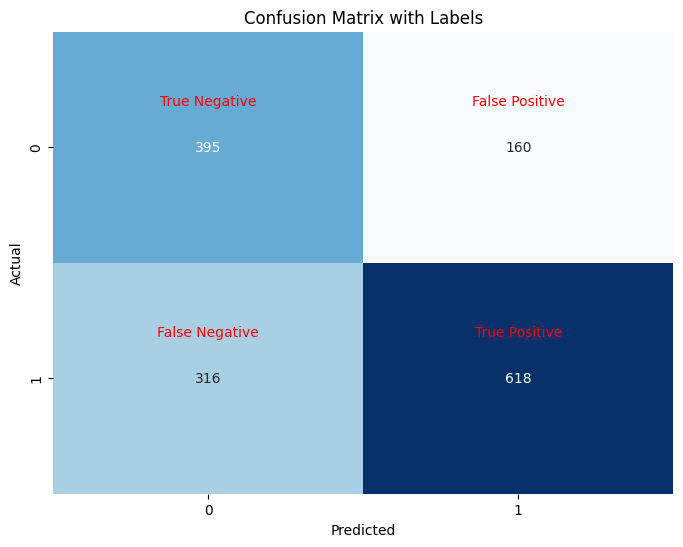

In [75]:
model4.plot(predictions4, y_valid)

### 16 Neuron Model Construction

In [76]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 16 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model16 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model16.train(np.array(X_train), np.array(y_train), epochs)
predictions16 = np.array(model16.predict(X_valid))
print("Model Accuracy", model16.validate(predictions16, y_valid))

Epoch 100, Loss: 0.4696
Epoch 200, Loss: 0.4602
Epoch 300, Loss: 0.4567
Epoch 400, Loss: 0.4574
Epoch 500, Loss: 0.4622
Epoch 600, Loss: 0.4663
Epoch 700, Loss: 0.4697
Epoch 800, Loss: 0.4703
Epoch 900, Loss: 0.4718
Epoch 1000, Loss: 0.4746
Model Accuracy 0.7058428475486904


Same process of adding more neurons

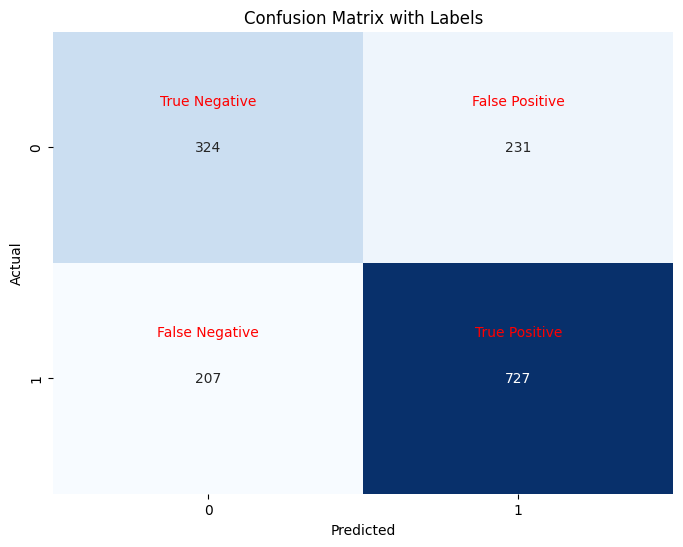

In [77]:
model16.plot(predictions16, y_valid)

### 32 Neuron Model Construction

In [78]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.001
epochs = 1000

model32 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model32.train(np.array(X_train), np.array(y_train), epochs)
predictions32 = np.array(model32.predict(X_valid))
print("Model Accuracy", model32.validate(predictions32, y_valid))

Epoch 100, Loss: 0.4579
Epoch 200, Loss: 0.4496
Epoch 300, Loss: 0.4498
Epoch 400, Loss: 0.4528
Epoch 500, Loss: 0.4552
Epoch 600, Loss: 0.4554
Epoch 700, Loss: 0.4546
Epoch 800, Loss: 0.4538
Epoch 900, Loss: 0.4534
Epoch 1000, Loss: 0.4532
Model Accuracy 0.7078576225654802


Same process of adding more neurons

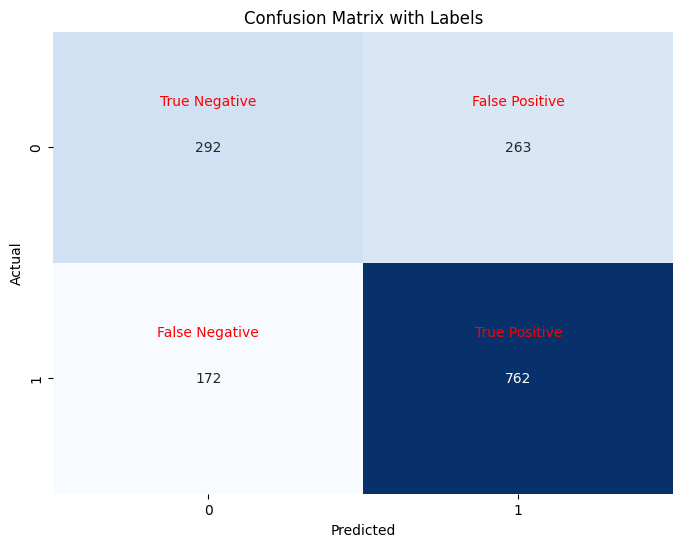

In [79]:
model32.plot(predictions32, y_valid)

### 0.002 Learning rate

In [80]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.002
epochs = 1000

model002 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model002.train(np.array(X_train), np.array(y_train), epochs)
predictions002 = np.array(model002.predict(X_valid))
print(model002.validate(predictions002, y_valid))

Epoch 100, Loss: 0.4553
Epoch 200, Loss: 0.4560
Epoch 300, Loss: 0.4586
Epoch 400, Loss: 0.4592
Epoch 500, Loss: 0.4581
Epoch 600, Loss: 0.4607
Epoch 700, Loss: 0.4633
Epoch 800, Loss: 0.4642
Epoch 900, Loss: 0.4638
Epoch 1000, Loss: 0.4647
0.7051712558764271


When we try and increase the learning rate, the 'bounce' happens very early. Because there was a bounce, we know that the learning rate was too high. Also notice that the loss function is lower, but the model accuracy is lower too. This is not a trade off we want.

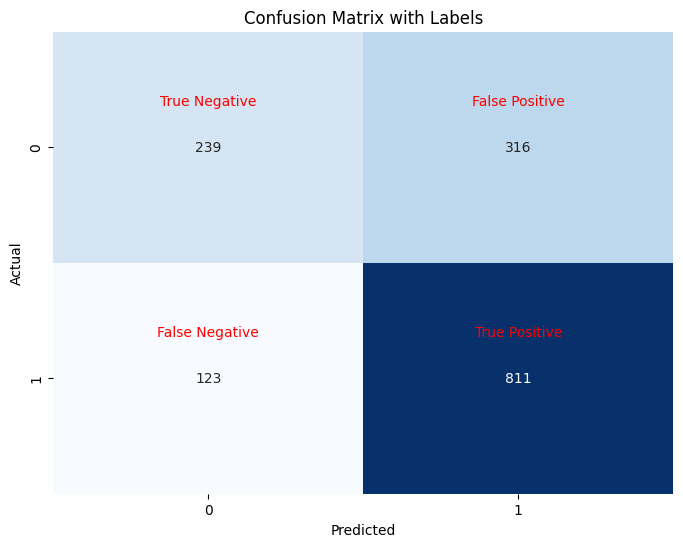

In [81]:
model002.plot(predictions002, y_valid)

### 0.0005 Learning rate

In [84]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0005
epochs = 1000

model0005 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model0005.train(np.array(X_train), np.array(y_train), epochs)
predictions0005 = np.array(model0005.predict(X_valid))
print(model0005.validate(predictions0005, y_valid))

Epoch 100, Loss: 0.4966
Epoch 200, Loss: 0.4709
Epoch 300, Loss: 0.4610
Epoch 400, Loss: 0.4567
Epoch 500, Loss: 0.4544
Epoch 600, Loss: 0.4529
Epoch 700, Loss: 0.4517
Epoch 800, Loss: 0.4509
Epoch 900, Loss: 0.4501
Epoch 1000, Loss: 0.4495
0.7139019476158496


The learning rate is slower at 0.0005 compared to 0.002, but gives us a better prediction accuracy of 71.3%. This because the 'bounce' didn't happen here like it did previously, which leads to smaller steps closer towards a lower risk.

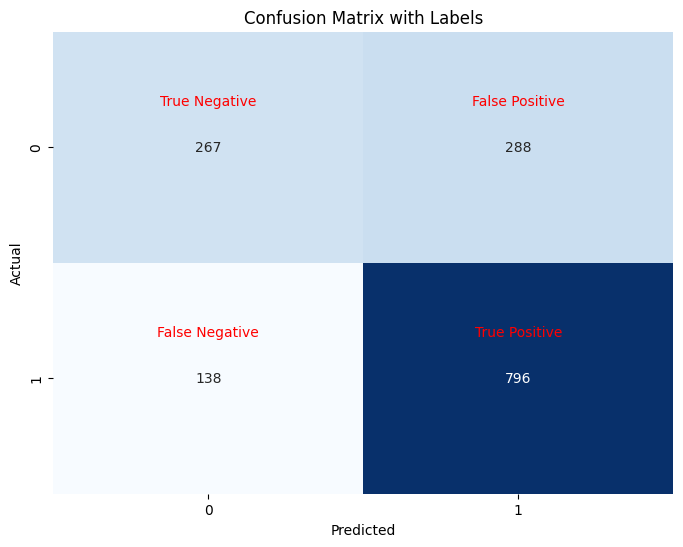

In [86]:
model0005.plot(predictions0005, y_valid)

### 2000 iterations, 0.0003 Learning Rate

In [89]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 32 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0003
epochs = 2000

model2000 = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
model2000.train(np.array(X_train), np.array(y_train), epochs)
predictions2000 = np.array(model2000.predict(X_valid))
print(model2000.validate(predictions2000, y_valid))

Epoch 100, Loss: 0.5007
Epoch 200, Loss: 0.4751
Epoch 300, Loss: 0.4627
Epoch 400, Loss: 0.4562
Epoch 500, Loss: 0.4527
Epoch 600, Loss: 0.4503
Epoch 700, Loss: 0.4483
Epoch 800, Loss: 0.4469
Epoch 900, Loss: 0.4459
Epoch 1000, Loss: 0.4456
Epoch 1100, Loss: 0.4455
Epoch 1200, Loss: 0.4456
Epoch 1300, Loss: 0.4458
Epoch 1400, Loss: 0.4462
Epoch 1500, Loss: 0.4467
Epoch 1600, Loss: 0.4473
Epoch 1700, Loss: 0.4478
Epoch 1800, Loss: 0.4483
Epoch 1900, Loss: 0.4487
Epoch 2000, Loss: 0.4490
0.7058428475486904


The more iterations allows the low learning rate to reach near the max loss possible. However even though the loss of this model is less than the previous (lower empirical risk), the true risk is higher due to the model accuracy being 0.2% worse.

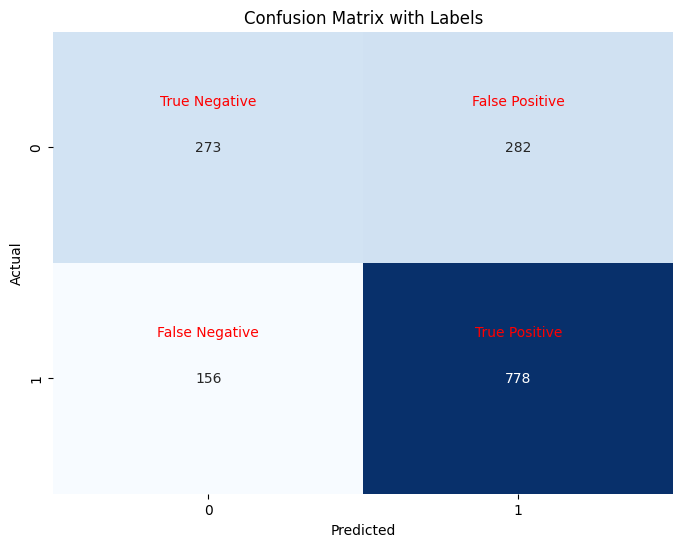

In [90]:
model2000.plot(predictions2000, y_valid)

### COMBINE EVERYTHING! 256 Neurons, 0.0002 Learning Rate, 4000 Iterations

In [94]:
# Create and train the neural network
input_size = X_train.shape[1]
hidden_size = 128 # Number of neurons in the hidden layer
output_size = 1
learning_rate = 0.0003
epochs = 1500

modelBIG = NeuralNetwork(input_size, hidden_size, output_size, learning_rate)
modelBIG.train(np.array(X_train), np.array(y_train), epochs)
predictionsBIG = np.array(modelBIG.predict(X_valid))
print(modelBIG.validate(predictionsBIG, y_valid))

Epoch 100, Loss: 0.6617
Epoch 200, Loss: 0.6234
Epoch 300, Loss: 0.5738
Epoch 400, Loss: 0.5167
Epoch 500, Loss: 0.4726
Epoch 600, Loss: 0.4479
Epoch 700, Loss: 0.4360
Epoch 800, Loss: 0.4297
Epoch 900, Loss: 0.4260
Epoch 1000, Loss: 0.4481
Epoch 1100, Loss: 0.4374
Epoch 1200, Loss: 0.4300
Epoch 1300, Loss: 0.4245
Epoch 1400, Loss: 0.4203
Epoch 1500, Loss: 0.4172
0.7024848891873741


This model has a lower loss of 0.4172 in comparision to before. Along with being more accurate which means the model has successfully lowered the empirical risk and the actual risk. Conclusion more neurons + more episiods + low enough learning rate = we get a higher accuracy, but becomes decently negligable, also activation function matters too.

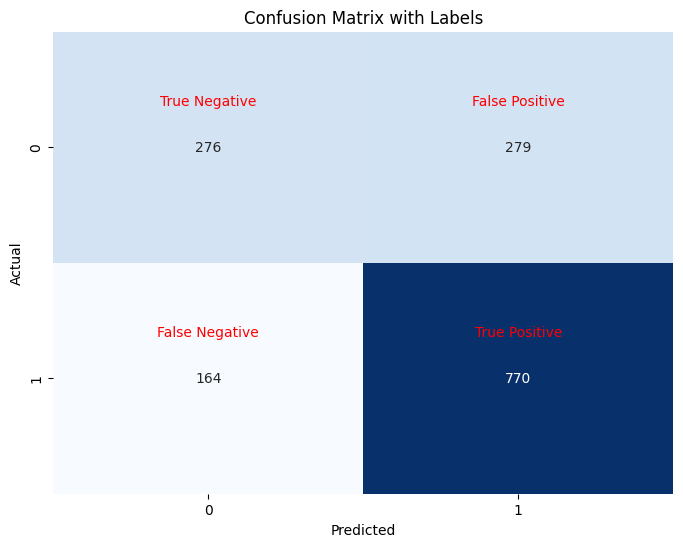

In [95]:
modelBIG.plot(predictionsBIG, y_valid)

---

# NOTE 
This is not a part of the submission, i was just testing multiple activation functions here.

In [176]:
import tensorflow as tf

# Define a simple neural network
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(64, activation='sigmoid', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='relu', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='softmax', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='elu', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='softplus', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='LeakyReLU', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='tanh', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='linear', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='exponential', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='softsign', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='hard_sigmoid', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='swish', input_shape=(4044,)),
    tf.keras.layers.Dense(64, activation='gelu', input_shape=(4044,)),
    # tf.keras.layers.Dense(64, activation='relu6', input_shape=(4044,)),
    tf.keras.layers.Dense(10, activation='sigmoid')
    # tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


model.fit(X_train, y_train, epochs=2, validation_data=(X_valid, y_valid))

test_loss, test_acc = model.evaluate(X_valid, y_valid)
print(test_acc)


Epoch 1/2
187/187 [==============================] - 1s 4ms/step - loss: 1.0774 - accuracy: 0.6806 - val_loss: 0.5662 - val_accuracy: 0.7327
Epoch 2/2
47/47 [==============================] - 0s 2ms/step - loss: 0.5498 - accuracy: 0.7314
0.7313633561134338
